In [1]:
#Importing libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Read the dataset

dataframe= pd.read_csv('Cust_Segmentation.csv', index_col = 0) #loads the csv file into a pandas dataframe
dataframe.head() #returns the first 5 rows

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
Customer Id,,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [3]:
dataframe.drop('Address', inplace=True, axis=1)
dataframe.head() #returns the first 5 rows

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3
2,47,1,26,100,4.582,8.218,0.0,12.8
3,33,2,10,57,6.111,5.802,1.0,20.9
4,29,2,4,19,0.681,0.516,0.0,6.3
5,47,1,31,253,9.308,8.908,0.0,7.2


In [4]:
#Checking datatypes and shape

dataframe.dtypes #returns the data types of the variables

Age                  int64
Edu                  int64
Years Employed       int64
Income               int64
Card Debt          float64
Other Debt         float64
Defaulted          float64
DebtIncomeRatio    float64
dtype: object

In [5]:
#Returns the number of rows and columns in the dataset.

dataframe.shape 

(850, 8)

In [6]:
#Returns the descriptive statistics of the dataset.

dataframe.describe() 

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [7]:
#Checking the number of missing values

dataframe.isnull().sum() 

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [8]:
# replacing missing values in Defaulted
# column with mean of that column
dataframe['Defaulted'] = dataframe['Defaulted'].fillna(dataframe['Defaulted'].mean())

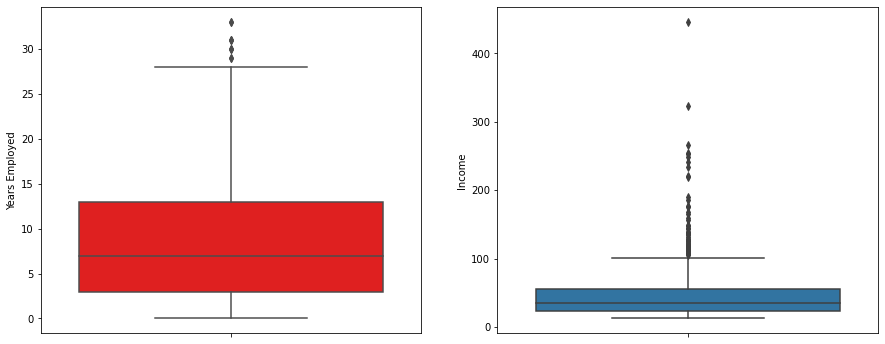

In [9]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=dataframe["Years Employed"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=dataframe["Income"])
plt.show()

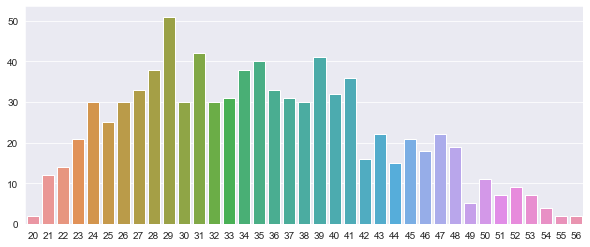

In [10]:
#bar plot to check the distribution of age

Age = dataframe.Age.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=Age.index, y=Age.values)
plt.show()

C:\Users\Urooj Afridi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


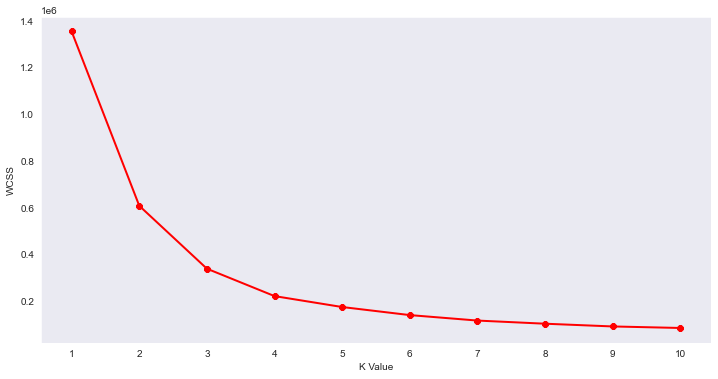

In [11]:
#using elbow method to choose number of k.
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(dataframe.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [12]:
#segmentation using k-means clustering

km = KMeans(n_clusters=5)
clusters = km.fit_predict(dataframe.iloc[:,1:])
dataframe["label"] = clusters

In [16]:
#plotting

plt.figure(figsize=(8,8))
plt.scatter(X[label == 0,0], X[label== 0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[label == 1,0], X[label== 1,1], s=50, c='yellow', label='Cluster 2')
plt.scatter(X[label == 2,0], X[label== 2,1], s=50, c='red', label='Cluster 3')
plt.scatter(X[label == 3,0], X[label== 3,1], s=50, c='purple', label='Cluster 4')
plt.scatter(X[label == 4,0], X[label== 4,1], s=50, c='blue', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_ [:,0], kmeans.cluster_centers_ [:,1], s= 100, c='black', marker= '*', label='Centriods') #Plotting the centriods
plt.title('Customer groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()  

NameError: name 'X' is not defined

<Figure size 576x576 with 0 Axes>

In [ ]:
#importing libraries

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

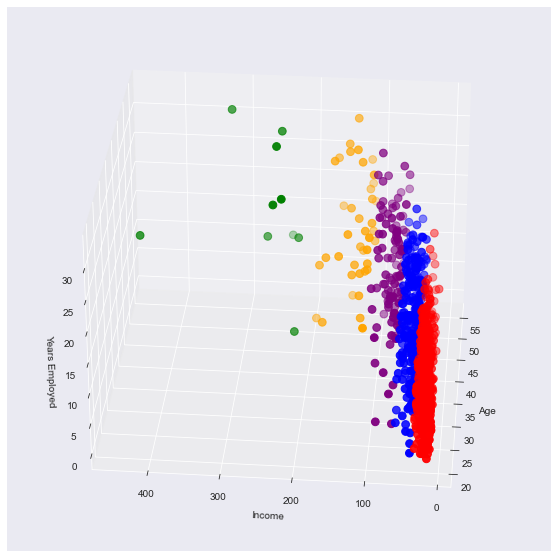

In [14]:
#plotting in 3D

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataframe.Age[dataframe.label == 0], dataframe["Income"][dataframe.label == 0], dataframe["Years Employed"][dataframe.label == 0], c='blue', s=60)
ax.scatter(dataframe.Age[dataframe.label == 1], dataframe["Income"][dataframe.label == 1], dataframe["Years Employed"][dataframe.label == 1], c='red', s=60)
ax.scatter(dataframe.Age[dataframe.label == 2], dataframe["Income"][dataframe.label == 2], dataframe["Years Employed"][dataframe.label == 2], c='green', s=60)
ax.scatter(dataframe.Age[dataframe.label == 3], dataframe["Income"][dataframe.label == 3], dataframe["Years Employed"][dataframe.label == 3], c='orange', s=60)
ax.scatter(dataframe.Age[dataframe.label == 4], dataframe["Income"][dataframe.label == 4], dataframe["Years Employed"][dataframe.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Income")
ax.set_zlabel('Years Employed')
plt.show()

In [ ]:
Q1. When should we split the data into training and testing sets when using K-means clustering, 
and why?
A:
When using K-means clustering, we do not mostly split the data into training and testing sets, 
as K-means is an unsupervised learning algorithm that does not require labels for the data.
But, if we want to evaluate the performance of the K-means clustering algorithm by testing the 
quality of the clusters produced by the algorithm, we split the data into training and testing 
sets before applying K-means clustering.

The training set would be used to train the K-means model on the data and generate the clusters, 
while the testing set would be used to evaluate the quality of the clusters. 


In [ ]:
Q2. Why do we need to scale the features before performing K-means clustering?
A: 
we need to scale the features before performing K-means clustering to ensure that the clustering results are not biased 
by the scale of the features. Common methods for scaling the features include standardization  and normalization.
It prevent features with larger magnitudes from dominating the distance metric. If the features have different scales, features 
with larger magnitudes can dominate the distance metric and have a disproportionate impact on the clustering results. 

To ensure features contribute equally to the clustering,If the features have different scales, 
some features may contribute more to the clustering than others. Scaling the features ensures that each 
feature contributes equally to the clustering results and also to improve the convergence rate